In [ ]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [29]:
df = pd.read_csv("Z.variantCall.SNPs_anno.noncoding.xls", sep='\t')
df.to_csv("Z.variantCall.SNPs_anno.noncoding.csv", index=False)

df_2 = pd.read_csv("Z.variantCall.SNPs_anno.coding.xls", sep='\t')
df_2.to_csv("Z.variantCall.SNPs_anno.coding.csv", index=False)

/var/folders/dh/ct60f64n7r30w2htbyy2py5c0000gn/T/ipykernel_28005/1763592262.py:1: DtypeWarning: Columns (19,20,21,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Z.variantCall.SNPs_anno.noncoding.xls", sep='\t')


In [5]:
# Load both converted CSV files
noncoding_path = "Z.variantCall.SNPs_anno.noncoding.csv"
coding_path = "Z.variantCall.SNPs_anno.coding.csv"

# Read both dataframes
df_noncoding = pd.read_csv(noncoding_path)
df_coding = pd.read_csv(coding_path)

# Check for structural consistency
noncoding_columns = df_noncoding.columns
coding_columns = df_coding.columns

# Compare structures
same_structure = list(noncoding_columns) == list(coding_columns)

# Basic summaries
noncoding_summary = {
    "num_rows": df_noncoding.shape[0],
    "num_columns": df_noncoding.shape[1],
    "column_names": list(df_noncoding.columns),
    "missing_values_per_column": df_noncoding.isnull().sum().to_dict()
}

coding_summary = {
    "num_rows": df_coding.shape[0],
    "num_columns": df_coding.shape[1],
    "column_names": list(df_coding.columns),
    "missing_values_per_column": df_coding.isnull().sum().to_dict()
}

{
    "same_structure": same_structure,
    "noncoding_summary": noncoding_summary,
    "coding_summary": coding_summary
}


/var/folders/dh/ct60f64n7r30w2htbyy2py5c0000gn/T/ipykernel_8936/3493844939.py:6: DtypeWarning: Columns (19,20,21,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df_noncoding = pd.read_csv(noncoding_path)


{'same_structure': True,
 'noncoding_summary': {'num_rows': 3464272,
  'num_columns': 91,
  'column_names': ['Gene',
   'Gene Full Name',
   'Chrom/Position',
   'Change',
   'Filter',
   'Mapping Quality (MQ)',
   'Genotype',
   'Frequency',
   'GQ Score',
   'Ref Depth',
   'Alt Depth',
   'Top Consequence',
   'Consequence',
   'Impact',
   'Splice Site',
   'Max. Population Frequency',
   'Max. Sub-Population Frequency',
   'ClinVar Evaluation',
   'ClinVar Phenotype',
   'OMIM',
   'HPO Phenotype',
   'GenCC Disease',
   'pLI',
   'SIFT',
   'PolyPhen',
   'Effect Prediction',
   'Effect Score',
   'CADD Conservation',
   'Intolerance',
   'GERP++ Score',
   'PhyloP46 Conservation',
   'PhyloP46 Conservation Score',
   'HGVS (RefGene)',
   'HGVS (VEP)',
   'Gene Family',
   'Gene Description',
   'GO Function',
   'GO Cell Component',
   'GO Pathway',
   'Literature',
   'COSMIC Count',
   'COSMIC Types',
   'Regulatory',
   'Interpro',
   'Splicing dbscSNV11',
   'SpliceAI Max. S

In [ ]:

# Merge both dataframes vertically (same columns)
merged_df = pd.concat([df_noncoding, df_coding], axis=0).reset_index(drop=True)

# Save to a new CSV file
merged_path = "Z.variantCall.SNPs_anno.complete.csv"
merged_df.to_csv(merged_path, index=False)


merged_df = pd.read_csv(merged_path)
# Display basic info

merged_info = {
    "num_rows": merged_df.shape[0],
    "num_columns": merged_df.shape[1],
    "column_names_sample": merged_df.columns[:10].tolist()
}
merged_info


KeyboardInterrupt: 

In [16]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3495851 entries, 0 to 3495850
Data columns (total 91 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Gene                            object 
 1   Gene Full Name                  object 
 2   Chrom/Position                  object 
 3   Change                          object 
 4   Filter                          object 
 5   Mapping Quality (MQ)            float64
 6   Genotype                        object 
 7   Frequency                       object 
 8   GQ Score                        int64  
 9   Ref Depth                       int64  
 10  Alt Depth                       int64  
 11  Top Consequence                 object 
 12  Consequence                     object 
 13  Impact                          object 
 14  Splice Site                     object 
 15  Max. Population Frequency       float64
 16  Max. Sub-Population Frequency   float64
 17  ClinVar Evaluation         

In [17]:
merged_df

,Gene,Gene Full Name,Chrom/Position,Change,Filter,Mapping Quality (MQ),Genotype,Frequency,GQ Score,Ref Depth,...,MutationAssessor Prediction,MetaLR Prediction,PROVEAN Prediction,MVP Score,MPC Score,VEST4 Score,PhyloP 46-way Score,PhyloP100 Vertebrate,PhyloP30 Mammalian,PrimateAI
0,NONE;DDX11L17,NaN,1:10247,SNP:T>C,PASS,35.36,Hom_1/1,100%,6,0,...,.,.,.,.,.,.,.,.,.,.
1,NONE;DDX11L17,NaN,1:10248,SNP:A>T,PASS,35.36,Hom_1/1,100%,6,0,...,.,.,.,.,.,.,.,.,.,.
2,DDX11L1;DDX11L17,NaN,1:12783,SNP:G>A,PASS,25.12,Het_0/1,70%,99,7,...,.,.,.,.,.,.,-0.783,.,.,.
3,WASH7P,NaN,1:14464,SNP:A>T,PASS,33.27,Het_0/1,28%,99,26,...,.,.,.,.,.,.,-0.640,.,.,.
4,WASH7P,NaN,1:15118,SNP:A>G,PASS,25.47,Het_0/1,42%,99,49,...,.,.,.,.,.,.,0.621,.,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495846,NONE;NONE,NaN,MT:8764,SNP:G>A,PASS,46.71,Hom_1/1,99%,99,1,...,.,.,.,.,.,.,-0.903,.,.,.
3495847,NONE;NONE,NaN,MT:8860,SNP:A>G,PASS,35.17,Hom_1/1,100%,99,0,...,.,.,.,.,.,.,-1.746,.,.,.
3495848,NONE;NONE,NaN,MT:14869,SNP:G>A,PASS,59.35,Hom_1/1,100%,99,0,...,.,.,.,.,.,.,4.578,.,.,.
3495849,NONE;NONE,NaN,MT:15326,SNP:A>G,PASS,60.00,Hom_1/1,100%,99,0,...,.,.,.,.,.,.,-4.154,.,.,.


In [ ]:
merged_df_chr22 = merged_df[merged_df["Chrom/Position"].str.startswith("22:")].copy()
merged_df_chr22

In [30]:
df = pd.read_csv("Z.variantCall.SNPs_anno.complete.csv")
df = merged_df

# Filter for chromosome 22
df_chr22 = df[df["Chrom/Position"].str.startswith("22:")].copy()

# Count number of mutations per gene

gene_mut_counts = df_chr22["Gene"].value_counts().reset_index()
gene_mut_counts.columns = ["Gene", "Mutation Count"]

/var/folders/dh/ct60f64n7r30w2htbyy2py5c0000gn/T/ipykernel_28005/786060285.py:1: DtypeWarning: Columns (19,20,21,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Z.variantCall.SNPs_anno.complete.csv")


In [31]:
df_chr22['Top Consequence'].value_counts()

intron_variant                            24731
intergenic_variant                        13520
upstream_gene_variant                      3802
non_coding_transcript_intron_variant        900
non_coding_transcript_exon_variant          840
3_prime_UTR_variant                         564
downstream_gene_variant                     368
missense_variant                            315
synonymous_variant                          308
5_prime_UTR_variant                          92
splice_polypyrimidine_tract_variant          56
splice_region_variant                        51
splice_donor_region_variant                  10
splice_donor_variant                          8
splice_donor_5th_base_variant                 7
splice_acceptor_variant                       6
stop_gained                                   5
start_lost                                    4
mature_miRNA_variant                          3
non_coding_transcript_splicing_variant        1
incomplete_terminal_codon_variant       

In [32]:

gene_mut_counts = df_chr22["Gene"].value_counts().reset_index()
gene_mut_counts.columns = ["Gene", "Mutation Count"]

In [33]:
gene_mut_counts = gene_mut_counts[gene_mut_counts['Gene'] != "NONE"]


In [34]:
gene_mut_counts.head(20)

,Gene,Mutation Count
0,LINC01310;NONE,1410
1,LARGE1;LINC02885,1098
2,LOC107987389,1008
3,LARGE1,808
4,LINC02554;MN1,783
5,TAFA5,759
6,LOC284930;MIR3201,718
7,SYN3,641
8,OR11H1;CCT8L2,567
9,TBC1D22A,550


In [35]:
filtered_df = gene_mut_counts[~gene_mut_counts['Gene'].str.contains(';')].reset_index(drop=True)

top_genes = filtered_df.sort_values(by='Mutation Count', ascending=False).head(13)
top_genes.head(13)



,Gene,Mutation Count
0,LOC107987389,1008
1,LARGE1,808
2,TAFA5,759
3,SYN3,641
4,TBC1D22A,550
5,LINC02885,447
6,SEZ6L,391
7,CELSR1,388
8,EFCAB6,349
9,CECR2,343


In [36]:
df = top_genes
filtfered_d = df[~df['Gene'].str.startswith('LOC') & (df['Gene'] != 'LINC02885')]

filtfered_d.head(13).reset_index(drop=True)

,Gene,Mutation Count
0,LARGE1,808
1,TAFA5,759
2,SYN3,641
3,TBC1D22A,550
4,SEZ6L,391
5,CELSR1,388
6,EFCAB6,349
7,CECR2,343
8,MYO18B,336
9,PACSIN2,330


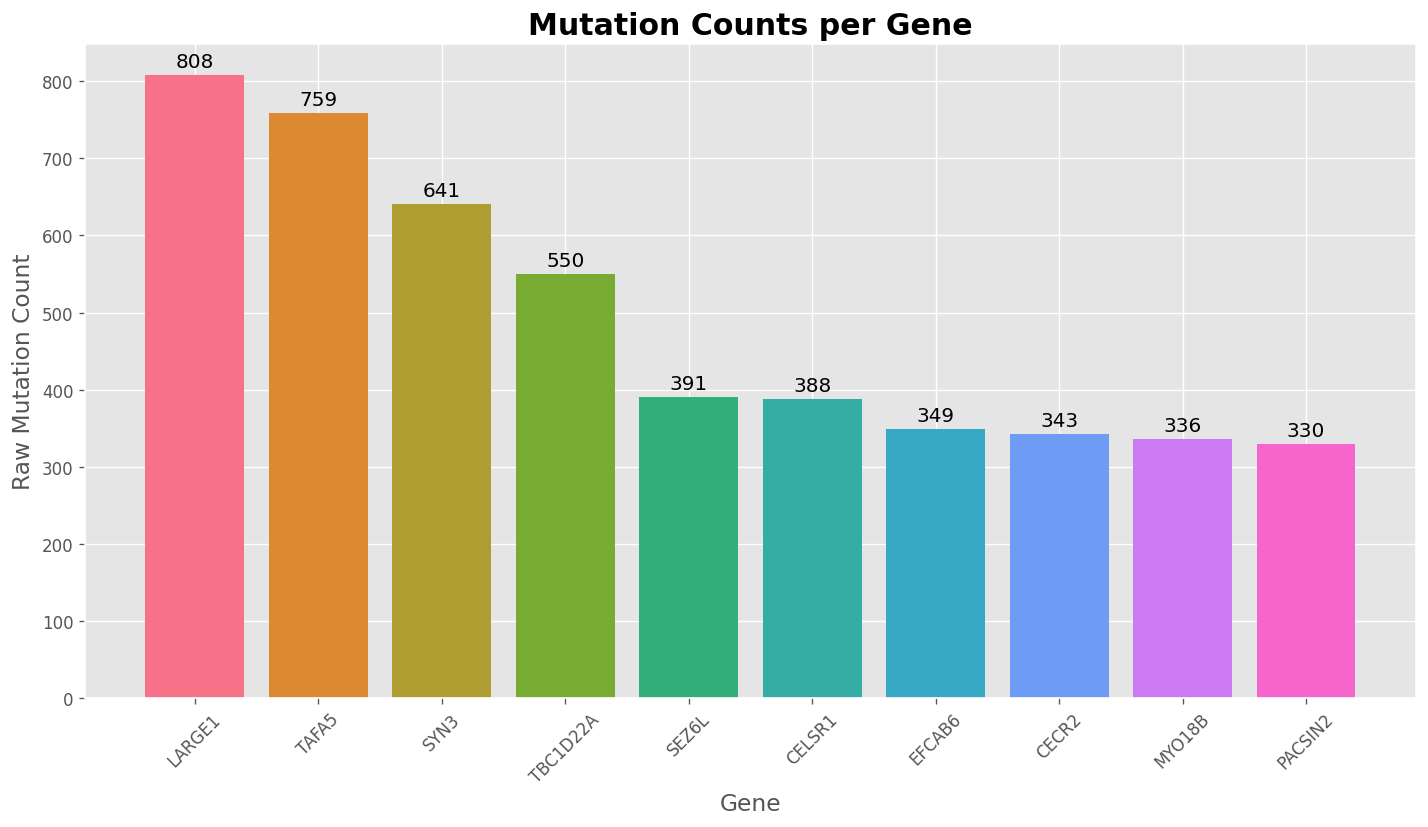

'mutation_counts_per_gene_multicolor.png'

In [42]:


# Use a clean style suitable for presentation
plt.style.use('ggplot')

# Generate a distinct color for each bar using a seaborn palette
palette = sns.color_palette("husl", len(filtfered_d))

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 7), dpi=120)
bars = ax.bar(filtfered_d["Gene"], filtfered_d["Mutation Count"], color=palette)

# Annotate each bar with its value
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2,
            height + 5,
            f"{height}",
            ha='center',
            va='bottom',
            fontsize=12)

# Labels and title
ax.set_title("Mutation Counts per Gene", fontsize=18, weight='bold')
ax.set_xlabel("Gene", fontsize=14)
ax.set_ylabel("Raw Mutation Count", fontsize=14)
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()

# Save a high-resolution version for slides
output_path = "mutation_counts_per_gene_multicolor.png"
fig.savefig(output_path, bbox_inches='tight')

plt.show()

output_path

Create VCF File

In [41]:
df_chr22

,Gene,Gene Full Name,Chrom/Position,Change,Filter,Mapping Quality (MQ),Genotype,Frequency,GQ Score,Ref Depth,...,MutationAssessor Prediction,MetaLR Prediction,PROVEAN Prediction,MVP Score,MPC Score,VEST4 Score,PhyloP 46-way Score,PhyloP100 Vertebrate,PhyloP30 Mammalian,PrimateAI
3336481,NONE;DUXAP8,NaN,22:16050822,SNP:G>A,PASS,29.34,Het_0/1,48%,99,17,...,.,.,.,.,.,.,-1.656,.,.,.
3336482,NONE;DUXAP8,NaN,22:16051249,SNP:T>C,PASS,58.93,Het_0/1,45%,99,21,...,.,.,.,.,.,.,0.058,.,.,.
3336483,NONE;DUXAP8,NaN,22:16051347,SNP:G>C,PASS,36.08,Hom_1/1,100%,81,0,...,.,.,.,.,.,.,0.064,.,.,.
3336484,NONE;DUXAP8,NaN,22:16051453,SNP:A>C,PASS,34.75,Het_0/1,44%,99,23,...,.,.,.,.,.,.,0.058,.,.,.
3336485,NONE;DUXAP8,NaN,22:16051497,SNP:A>G,PASS,36.21,Hom_1/1,100%,99,0,...,.,.,.,.,.,.,0.058,.,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495414,ARSA,arylsulfatase A,22:51064039,SNP:G>C,PASS,60.00,Hom_1/1,100%,77,0,...,.,T,N,.,.,0.031,-0.076,0.122,-1.913,.
3495415,ARSA,arylsulfatase A,22:51064068,SNP:G>A,PASS,60.00,Het_0/1,57%,99,10,...,.,.,.,.,.,.,-1.434,.,.,.
3495416,ARSA,arylsulfatase A,22:51064416,SNP:T>C,PASS,60.00,Het_0/1,46%,99,20,...,.,T,N,.,.,0.149,1.967,1.458,1.138,.
3495417,ARSA,arylsulfatase A,22:51065600,SNP:G>A,PASS,60.00,Het_0/1,33%,99,16,...,.,.,.,.,.,.,-1.003,.,.,.


In [43]:
# 1. Genes of interest
genes = [
    "LARGE1", "TAFA5", "SYN3", "TBC1D22A", "SEZ6L",
    "CELSR1", "EFCAB6", "CECR2", "MYO18B", "PACSIN2"
]

# 2. Keep only variants in those genes
filtered = df_chr22[df_chr22["Gene"].isin(genes)]

# 3. Sanity-check: raw mutation counts per gene
mutation_counts = (
    filtered["Gene"]
    .value_counts()
    .reindex(genes, fill_value=0)   # keep original order, fill missing with 0
)

print("Raw mutation counts:")
print(mutation_counts)

Raw mutation counts:
LARGE1      808
TAFA5       759
SYN3        641
TBC1D22A    550
SEZ6L       391
CELSR1      388
EFCAB6      349
CECR2       343
MYO18B      336
PACSIN2     330
Name: Gene, dtype: int64


In [46]:
filtered.head(5)

,Gene,Gene Full Name,Chrom/Position,Change,Filter,Mapping Quality (MQ),Genotype,Frequency,GQ Score,Ref Depth,...,MutationAssessor Prediction,MetaLR Prediction,PROVEAN Prediction,MVP Score,MPC Score,VEST4 Score,PhyloP 46-way Score,PhyloP100 Vertebrate,PhyloP30 Mammalian,PrimateAI
3338444,CECR2,CECR2 histone acetyl-lysine reader,22:17840123,SNP:A>G,PASS,60.0,Hom_1/1,100%,51,0,...,.,.,.,.,.,.,0.178,.,.,.
3338445,CECR2,CECR2 histone acetyl-lysine reader,22:17840229,SNP:C>T,PASS,60.0,Hom_1/1,100%,84,0,...,.,.,.,.,.,.,-1.438,.,.,.
3338446,CECR2,CECR2 histone acetyl-lysine reader,22:17840629,SNP:G>C,PASS,60.0,Hom_1/1,100%,99,0,...,.,.,.,.,.,.,-0.077,.,.,.
3338447,CECR2,CECR2 histone acetyl-lysine reader,22:17840791,SNP:T>C,PASS,60.0,Hom_1/1,100%,99,0,...,.,.,.,.,.,.,-0.986,.,.,.
3338448,CECR2,CECR2 histone acetyl-lysine reader,22:17841198,SNP:C>G,PASS,60.0,Hom_1/1,100%,96,0,...,.,.,.,.,.,.,0.122,.,.,.


In [ ]:
# ------------------------------------------------------------------
# 0.  INPUTS --------------------------------------------------------
# ------------------------------------------------------------------
orig_vcf_path = Path("Z.variantCall.SNPs.vcf")          # copy meta-data from here
out_vcf_path  = Path("chr22_top10_annotated.vcf")    # final VCF to create
df            = df_chr22.copy()                        # your DataFrame in RAM

# ------------------------------------------------------------------
# 1.  Filter to genes of interest ----------------------------------
# ------------------------------------------------------------------
genes = [
    "LARGE1", "TAFA5", "SYN3", "TBC1D22A", "SEZ6L",
    "CELSR1", "EFCAB6", "CECR2", "MYO18B", "PACSIN2"
]
filtered = df[df["Gene"].isin(genes)].reset_index(drop=True)

# ------------------------------------------------------------------
# 2.  Parse mandatory VCF columns ----------------------------------
# ------------------------------------------------------------------
# CHROM & POS
filtered[["CHROM", "POS"]] = (
    filtered["Chrom/Position"].str.split(":", expand=True)
)
filtered["POS"] = filtered["POS"].astype(int)

# REF & ALT
changes          = filtered["Change"].str.split("[:>]", expand=True)
filtered["REF"]  = changes[1]
filtered["ALT"]  = changes[2]

# Other mandatory fields
filtered["ID"]     = "."
filtered["QUAL"]   = filtered["Mapping Quality (MQ)"]
filtered["FILTER"] = filtered["Filter"]

# ------------------------------------------------------------------
# 3.  Build INFO field (unique keys, no dups) ----------------------
# ------------------------------------------------------------------
mandatory = {"CHROM","POS","ID","REF","ALT","QUAL","FILTER","INFO"}
ann_cols  = [c for c in filtered.columns if c not in mandatory]

seen_keys = set()                       # avoid duplicate IDs

def make_key(col: str) -> str:
    """Return a unique, spec-safe INFO key for a DataFrame column."""
    base = (
        col.split()[0]          # first token
           .replace("(", "")
           .replace(")", "")
           .replace("/", "_")
           .replace(".", "")
           .replace(" ", "_")
    )
    key = base
    i   = 2
    while key in seen_keys:      # add suffix until unique
        key = f"{base}_{i}"
        i  += 1
    seen_keys.add(key)
    return key

col2key = {c: make_key(c) for c in ann_cols}

def row_to_info(row):
    kv = [
        f"{col2key[c]}={row[c]}"
        for c in ann_cols
        if pd.notna(row[c]) and row[c] not in {".", ""}
    ]
    return ";".join(kv) if kv else "."

filtered["INFO"] = filtered.apply(row_to_info, axis=1)

# ------------------------------------------------------------------
# 4.  Create ##INFO meta-lines (one per annotation col) ------------
# ------------------------------------------------------------------
def info_header(col):
    key = col2key[col]
    dt  = filtered[col].dtype
    typ = ("Float"   if dt.kind == "f"
           else "Integer" if dt.kind in "iu"
           else "String")
    desc = col.replace('"', "'")
    return f'##INFO=<ID={key},Number=1,Type={typ},Description="{desc}">\n'

info_headers = [info_header(c) for c in ann_cols]

# ------------------------------------------------------------------
# 5.  Collect original meta-data (up to—but not incl.—#CHROM) ------
# ------------------------------------------------------------------
meta_lines = []
with orig_vcf_path.open() as f:
    for line in f:
        if line.startswith("#CHROM"):
            break
        meta_lines.append(line)

# Our own eight-column #CHROM header (matches body)
chrom_line = "#CHROM\tPOS\tID\tREF\tALT\tQUAL\tFILTER\tINFO\n"

header = meta_lines + info_headers + [chrom_line]

# ------------------------------------------------------------------
# 6.  Write out the final VCF (body has 8 columns) -----------------
# ------------------------------------------------------------------
vcf_cols = ["CHROM","POS","ID","REF","ALT","QUAL","FILTER","INFO"]

with out_vcf_path.open("w") as out:
    out.writelines(header)
    filtered.to_csv(
        out,
        sep="\t",
        header=False,
        index=False,
        columns=vcf_cols,
    )

print("Filtered + annotated VCF", out_vcf_path.resolve())

Filtered + annotated VCF /Users/sinao/Project_CBB/Results/chr22_top10_annotated.vcf


In [52]:
filtered

,Gene,Gene Full Name,Chrom/Position,Change,Filter,Mapping Quality (MQ),Genotype,Frequency,GQ Score,Ref Depth,...,PhyloP30 Mammalian,PrimateAI,CHROM,POS,REF,ALT,ID,QUAL,FILTER,INFO
0,CECR2,CECR2 histone acetyl-lysine reader,22:17840123,SNP:A>G,PASS,60.00,Hom_1/1,100%,51,0,...,.,.,22,17840123,A,G,.,60.00,PASS,Gene=CECR2;GeneFullName=CECR2 histone acetyl-l...
1,CECR2,CECR2 histone acetyl-lysine reader,22:17840229,SNP:C>T,PASS,60.00,Hom_1/1,100%,84,0,...,.,.,22,17840229,C,T,.,60.00,PASS,Gene=CECR2;GeneFullName=CECR2 histone acetyl-l...
2,CECR2,CECR2 histone acetyl-lysine reader,22:17840629,SNP:G>C,PASS,60.00,Hom_1/1,100%,99,0,...,.,.,22,17840629,G,C,.,60.00,PASS,Gene=CECR2;GeneFullName=CECR2 histone acetyl-l...
3,CECR2,CECR2 histone acetyl-lysine reader,22:17840791,SNP:T>C,PASS,60.00,Hom_1/1,100%,99,0,...,.,.,22,17840791,T,C,.,60.00,PASS,Gene=CECR2;GeneFullName=CECR2 histone acetyl-l...
4,CECR2,CECR2 histone acetyl-lysine reader,22:17841198,SNP:C>G,PASS,60.00,Hom_1/1,100%,96,0,...,.,.,22,17841198,C,G,.,60.00,PASS,Gene=CECR2;GeneFullName=CECR2 histone acetyl-l...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,CELSR1,cadherin EGF LAG seven-pass G-type receptor 1,22:46931402,SNP:G>C,PASS,60.00,Het_0/1,51%,99,18,...,0.245,.,22,46931402,G,C,.,60.00,PASS,Gene=CELSR1;GeneFullName=cadherin EGF LAG seve...
4891,CELSR1,cadherin EGF LAG seven-pass G-type receptor 1,22:46931793,SNP:G>C,PASS,60.00,Het_0/1,46%,99,21,...,.,.,22,46931793,G,C,.,60.00,PASS,Gene=CELSR1;GeneFullName=cadherin EGF LAG seve...
4892,CELSR1,cadherin EGF LAG seven-pass G-type receptor 1,22:46931838,SNP:G>A,PASS,60.00,Het_0/1,48%,99,21,...,.,.,22,46931838,G,A,.,60.00,PASS,Gene=CELSR1;GeneFullName=cadherin EGF LAG seve...
4893,TBC1D22A,TBC1 domain family member 22A,22:47185265,SNP:G>T,PASS,58.87,Het_0/1,42%,99,15,...,.,.,22,47185265,G,T,.,58.87,PASS,Gene=TBC1D22A;GeneFullName=TBC1 domain family ...
